In [2]:
#Open the datasets

import json
import os

file_path_jan = os.path.join('..', 'dataset','Compiled', 'Jan', 'dataset_compiled_jan.json')
with open(file_path_jan) as result_jan:
    result_jan = json.load(result_jan)
    
file_path_apr = os.path.join('..', 'dataset','Compiled', 'Apr', 'dataset_compiled_apr.json')
with open(file_path_apr) as result_apr:
    result_apr = json.load(result_apr)
    
file_path_sep = os.path.join('..', 'dataset','Compiled', 'Sep','dataset_compiled_sep.json')
with open(file_path_sep) as result_sep:
    result_sep = json.load(result_sep)


In [3]:
# Clean the result from dictionaries with missing 'itemList' - object containing our data

result_jan = [v for v in result_jan if 'itemList' in v and v['itemList']]

result_apr = [v for v in result_apr if 'itemList' in v and v['itemList']]

result_sep = [v for v in result_sep if 'itemList' in v and v['itemList']]

In [4]:
#Pretty print, check the structure of the object

from pprint import pprint
pprint(result_sep[1]['itemList'])

[{'BAInfo': '',
  'adAuthorization': False,
  'adLabelVersion': 0,
  'author': {'avatarLarger': 'https://p16-sign-va.tiktokcdn.com/tos-maliva-avt-0068/043f3995f78f43394bd008a8cc7cc00c~c5_1080x1080.jpeg?x-expires=1696150800&x-signature=MLgY16EJWlZOolZr8GlSwlSFhy0%3D',
             'avatarMedium': 'https://p16-sign-va.tiktokcdn.com/tos-maliva-avt-0068/043f3995f78f43394bd008a8cc7cc00c~c5_720x720.jpeg?x-expires=1696150800&x-signature=17kLhMTmtld0nV%2F%2Fzf7sTyBfcSE%3D',
             'avatarThumb': 'https://p16-sign-va.tiktokcdn.com/tos-maliva-avt-0068/043f3995f78f43394bd008a8cc7cc00c~c5_100x100.jpeg?x-expires=1696150800&x-signature=0Gddu89qpzlPrDYaDzAT4Ny%2FVAw%3D',
             'commentSetting': 0,
             'downloadSetting': 3,
             'duetSetting': 0,
             'ftc': False,
             'id': '6764546377709241350',
             'isADVirtual': False,
             'isEmbedBanned': False,
             'nickname': 'Offff😝',
             'openFavorite': False,
             'pri

                  'desc': '',
                  'id': '1616124817395734',
                  'isCommerce': False,
                  'profileLarger': '',
                  'profileMedium': '',
                  'profileThumb': '',
                  'stats': {'videoCount': 0, 'viewCount': 0},
                  'title': 'successtips'},
                 {'coverLarger': '',
                  'coverMedium': '',
                  'coverThumb': '',
                  'desc': '',
                  'id': '14975251',
                  'isCommerce': False,
                  'profileLarger': '',
                  'profileMedium': '',
                  'profileThumb': '',
                  'stats': {'videoCount': 0, 'viewCount': 0},
                  'title': 'digitalnomad'},
                 {'coverLarger': '',
                  'coverMedium': '',
                  'coverThumb': '',
                  'desc': '',
                  'id': '1612963776839686',
                  'isCommerce': False,
      

                  'id': '1702420398092289',
                  'isCommerce': False,
                  'profileLarger': '',
                  'profileMedium': '',
                  'profileThumb': '',
                  'stats': {'videoCount': 0, 'viewCount': 0},
                  'title': 'baliitinerary'},
                 {'coverLarger': '',
                  'coverMedium': '',
                  'coverThumb': '',
                  'desc': 'Love food? Show us your favorite dishes and '
                          'recipes.',
                  'id': '251048',
                  'isCommerce': False,
                  'profileLarger': 'https://p16-amd-va.tiktokcdn.com/obj/musically-maliva-obj/c6cae408e992316b525724a22e160516.png',
                  'profileMedium': 'https://p16-amd-va.tiktokcdn.com/obj/musically-maliva-obj/c6cae408e992316b525724a22e160516.png',
                  'profileThumb': 'https://p16-amd-va.tiktokcdn.com/obj/musically-maliva-obj/c6cae408e992316b525724a22e160516.png',
  

                           'https://p16-sign-useast2a.tiktokcdn.com/tos-useast2a-p-0037-euttp/1bc2ec41661a4e2590cf470d0612e7f4_1686729352~tplv-tiktokx-share-play.jpeg?x-expires=1696582800&x-signature=JXfgCcqcQ1iTt9f4jRvAxalv%2B1A%3D'],
            'size': 17106058,
            'subtitleInfos': [{'Format': 'webvtt',
                               'LanguageCodeName': 'fra-FR',
                               'LanguageID': '7',
                               'Size': 1974,
                               'Source': 'MT',
                               'Url': 'https://v16-webapp.tiktok.com/4597aa4fe1b92bccc84b8a2a419c252d/65193a5d/video/tos/useast2a/tos-useast2a-v-0037-euttp/d0ff0d918a3e4b01be8bc1ba967d6602/?a=1988&ch=0&cr=3&dr=0&lr=unwatermarked&cd=0%7C0%7C0%7C3&cv=1&br=21108&bt=10554&bti=NDU3ZjAwOg%3D%3D&ds=4&ft=_GC~MBNXq8Zmoxj95Q_vj4Ha8AhLrus&mime_type=video_mp4&qs=13&rc=am53bDk6ZjxxbDMzZjczM0Bpam53bDk6ZjxxbDMzZjczM0A0ZC1hcjRvMTFgLS1kMWNzYSM0ZC1hcjRvMTFgLS1kMWNzcw%3D%3D&l=20230929092130A1EE

  'textExtra': [{'awemeId': '',
                 'end': 118,
                 'hashtagId': '73372577',
                 'hashtagName': 'playanegra',
                 'isCommerce': False,
                 'secUid': '',
                 'start': 107,
                 'subType': 0,
                 'type': 1,
                 'userId': '',
                 'userUniqueId': ''},
                {'awemeId': '',
                 'end': 131,
                 'hashtagId': '703424',
                 'hashtagName': 'puertoviejo',
                 'isCommerce': False,
                 'secUid': '',
                 'start': 119,
                 'subType': 0,
                 'type': 1,
                 'userId': '',
                 'userUniqueId': ''},
                {'awemeId': '',
                 'end': 145,
                 'hashtagId': '14975251',
                 'hashtagName': 'digitalnomad',
                 'isCommerce': False,
                 'secUid': '',
                 'start': 1

                 'start': 280,
                 'subType': 0,
                 'type': 1,
                 'userId': '',
                 'userUniqueId': ''},
                {'awemeId': '',
                 'end': 298,
                 'hashtagId': '5541',
                 'hashtagName': 'bestfriend',
                 'isCommerce': False,
                 'secUid': '',
                 'start': 287,
                 'subType': 0,
                 'type': 1,
                 'userId': '',
                 'userUniqueId': ''}],
  'video': {'bitrate': 1939835,
            'bitrateInfo': [{'Bitrate': 2342515,
                             'CodecType': 'h265_hvc1',
                             'GearName': 'adapt_lowest_1080_1',
                             'PlayAddr': {'DataSize': 3006326,
                                          'FileCs': 'c:0-10069-2ce8',
                                          'FileHash': '295f5e353c676812e409ae11c9018a75',
                                          'U

                {'awemeId': '',
                 'end': 66,
                 'hashtagId': '71719463',
                 'hashtagName': 'solotravel',
                 'isCommerce': False,
                 'secUid': '',
                 'start': 55,
                 'subType': 0,
                 'type': 1,
                 'userId': '',
                 'userUniqueId': ''},
                {'awemeId': '',
                 'end': 82,
                 'hashtagId': '1618211039372289',
                 'hashtagName': 'girlswhotravel',
                 'isCommerce': False,
                 'secUid': '',
                 'start': 67,
                 'subType': 0,
                 'type': 1,
                 'userId': '',
                 'userUniqueId': ''}],
  'video': {'bitrate': 2358188,
            'bitrateInfo': [{'Bitrate': 2358188,
                             'CodecType': 'h264',
                             'GearName': 'normal_540_0',
                             'PlayAddr': {'DataSi

                              {'awemeId': '',
                               'end': 732,
                               'hashtagId': '1646813427429381',
                               'hashtagName': 'femaletraveler',
                               'isCommerce': False,
                               'secUid': '',
                               'start': 717,
                               'subType': 0,
                               'type': 1,
                               'userId': '',
                               'userUniqueId': ''},
                              {'awemeId': '',
                               'end': 755,
                               'hashtagId': '1672220792071653',
                               'hashtagName': 'femaletravelcommunity',
                               'isCommerce': False,
                               'secUid': '',
                               'start': 733,
                               'subType': 0,
                               'type': 1,
    

                                          'UrlList': ['https://v16-webapp-prime.tiktok.com/video/tos/maliva/tos-maliva-ve-0068c801-us/okEdEAtcktUKaOIxCHo7IVfhCjrUcxvSz8g4Ax/?a=1988&ch=0&cr=3&dr=0&lr=unwatermarked&cd=0%7C0%7C0%7C3&cv=1&br=826&bt=413&bti=NDU3ZjAwOg%3D%3D&cs=2&ds=4&ft=_RwJrBNXq8Zmoxj95Q_vj4Ha8AhLrus&mime_type=video_mp4&qs=15&rc=O2RnZjQ6OWU0ODQ2OTVkOUBpM25ncTc6ZjZqZzMzNzczM0AxY2JfXi1iNV4xMjUxMGExYSNhXjRicjRvMWtgLS1kMTZzcw%3D%3D&btag=e00088000&expire=1696152104&l=20230929092130A1EE2E2D9C97081C7F2D&ply_type=2&policy=2&signature=a774e232eac2eb821c27d4dc28445051&tk=tt_chain_token',
                                                      'https://v19-webapp-prime.tiktok.com/video/tos/maliva/tos-maliva-ve-0068c801-us/okEdEAtcktUKaOIxCHo7IVfhCjrUcxvSz8g4Ax/?a=1988&ch=0&cr=3&dr=0&lr=unwatermarked&cd=0%7C0%7C0%7C3&cv=1&br=826&bt=413&bti=NDU3ZjAwOg%3D%3D&cs=2&ds=4&ft=_RwJrBNXq8Zmoxj95Q_vj4Ha8AhLrus&mime_type=video_mp4&qs=15&rc=O2RnZjQ6OWU0ODQ2OTVkOUBpM25ncTc6ZjZqZzMzNzczM0AxY2JfXi1iNV

                             'CodecType': 'h264',
                             'GearName': 'lower_540_0',
                             'PlayAddr': {'DataSize': 11101250,
                                          'FileCs': 'c:0-94538-24c4',
                                          'FileHash': '8287468b6358bdb6ed3f2580677d4cf5',
                                          'Uri': 'v12044gd0000cg90e2bc77u5qm90hln0',
                                          'UrlKey': 'v12044gd0000cg90e2bc77u5qm90hln0_h264_540p_777085',
                                          'UrlList': ['https://v16-webapp-prime.tiktok.com/video/tos/maliva/tos-maliva-ve-0068c799-us/389a233f13e0474c944145116cd82897/?a=1988&ch=0&cr=3&dr=0&lr=unwatermarked&cd=0%7C0%7C0%7C3&cv=1&br=1516&bt=758&bti=NDU3ZjAwOg%3D%3D&cs=0&ds=6&ft=_RwJrBNXq8Zmoxj95Q_vj4Ha8AhLrus&mime_type=video_mp4&qs=4&rc=NWU0ZGZoN2lpaTZlNTtkZkBpM28zcDg6ZjUzajMzZzczNEBjNjQ2LS0tNTIxYTRjNjU2YSNrZTZucjRfYjZgLS1kMS9zcw%3D%3D&btag=e00090000&expire=1696152205&l=202309

                 'hashtagId': '1709529551867910',
                 'hashtagName': 'travelinginyour20s',
                 'isCommerce': False,
                 'secUid': '',
                 'start': 215,
                 'subType': 0,
                 'type': 1,
                 'userId': '',
                 'userUniqueId': ''},
                {'awemeId': '',
                 'end': 246,
                 'hashtagId': '260248',
                 'hashtagName': 'bucketlist',
                 'isCommerce': False,
                 'secUid': '',
                 'start': 235,
                 'subType': 0,
                 'type': 1,
                 'userId': '',
                 'userUniqueId': ''},
                {'awemeId': '',
                 'end': 258,
                 'hashtagId': '77593787',
                 'hashtagName': 'remotework',
                 'isCommerce': False,
                 'secUid': '',
                 'start': 247,
                 'subType': 0,
             

                               'hashtagId': '88764338',
                               'hashtagName': 'foryoupage',
                               'isCommerce': False,
                               'secUid': '',
                               'start': 15,
                               'subType': 0,
                               'type': 1,
                               'userId': '',
                               'userUniqueId': ''},
                              {'awemeId': '',
                               'end': 34,
                               'hashtagId': '1604302285252613',
                               'hashtagName': 'fypage',
                               'isCommerce': False,
                               'secUid': '',
                               'start': 27,
                               'subType': 0,
                               'type': 1,
                               'userId': '',
                               'userUniqueId': ''},
                          

                 'end': 89,
                 'hashtagId': '42598597',
                 'hashtagName': 'emprendimiento',
                 'isCommerce': False,
                 'secUid': '',
                 'start': 74,
                 'subType': 0,
                 'type': 1,
                 'userId': '',
                 'userUniqueId': ''}],
  'video': {'bitrate': 1106581,
            'bitrateInfo': [{'Bitrate': 1106581,
                             'CodecType': 'h264',
                             'GearName': 'normal_540_0',
                             'PlayAddr': {'DataSize': 2106654,
                                          'FileCs': 'c:0-13640-db12',
                                          'FileHash': '5cb3255c6aae72f1398c21c8ea6fa28f',
                                          'Uri': 'v09044g40000c4trh8jc77u0so570h30',
                                          'UrlKey': 'v09044g40000c4trh8jc77u0so570h30_h264_540p_1106581',
                                          'UrlList

                  'coverMedium': '',
                  'coverThumb': '',
                  'desc': 'From small shops to filling packages in your '
                          "garage, here's to each and every "
                          '#SmallBusinessOwner.',
                  'id': '70509662',
                  'isCommerce': False,
                  'profileLarger': 'https://p16-amd-va.tiktokcdn.com/obj/musically-maliva-obj/b6897133282041d2f3f29866d159de9b',
                  'profileMedium': 'https://p16-amd-va.tiktokcdn.com/obj/musically-maliva-obj/b6897133282041d2f3f29866d159de9b',
                  'profileThumb': 'https://p16-amd-va.tiktokcdn.com/obj/musically-maliva-obj/b6897133282041d2f3f29866d159de9b',
                  'stats': {'videoCount': 0, 'viewCount': 0},
                  'title': 'smallbusinessowner'},
                 {'coverLarger': '',
                  'coverMedium': '',
                  'coverThumb': '',
                  'desc': '',
                  'id': '459

                               'UrlExpire': 1696152284,
                               'Version': '4',
                               'VideoSubtitleID': 1988324730},
                              {'Format': 'webvtt',
                               'LanguageCodeName': 'por-PT',
                               'LanguageID': '8',
                               'Size': 7353,
                               'Source': 'MT',
                               'Url': 'https://v16-webapp.tiktok.com/59d20ec614a7fd1a477fb66864820405/65193adc/video/tos/useast2a/tos-useast2a-v-0068/d988c280ac014fa78569fe1ac2bc385a/?a=1988&ch=0&cr=3&dr=0&lr=unwatermarked&cd=0%7C0%7C0%7C3&cv=1&br=61614&bt=30807&bti=NDU3ZjAwOg%3D%3D&ft=_GC~MBNXq8Zmoxj95Q_vj4Ha8AhLrus&mime_type=video_mp4&qs=13&rc=MzRscTg6ZnBmajMzNzgzM0BpMzRscTg6ZnBmajMzNzgzM0BgYWhycjRvbm1gLS1kLzZzYSNgYWhycjRvbm1gLS1kLzZzcw%3D%3D&l=20230929092130A1EE2E2D9C97081C7F2D&btag=e00058000',
                               'UrlExpire': 1696152284,
                     

                               'start': 165,
                               'subType': 0,
                               'type': 1,
                               'userId': '',
                               'userUniqueId': ''},
                              {'awemeId': '',
                               'end': 195,
                               'hashtagId': '33482446',
                               'hashtagName': 'workandtravel',
                               'isCommerce': False,
                               'secUid': '',
                               'start': 181,
                               'subType': 0,
                               'type': 1,
                               'userId': '',
                               'userUniqueId': ''},
                              {'awemeId': '',
                               'end': 207,
                               'hashtagId': '77593787',
                               'hashtagName': 'remotework',
                               '

In [27]:
#expanding nestled dictionaries

extended_list_jan = []
extended_list_apr = []
extended_list_sep = []
for i, v in enumerate(result_jan):
    itemlist_jan = v.get('itemList')
    if itemlist_jan:
        extended_list_jan.extend(itemlist_jan)
    else:
        print(f'itemlist missing: {i}')

for i, v in enumerate(result_apr):
    itemlist_apr = v.get('itemList')
    if itemlist_apr:
        extended_list_apr.extend(itemlist_apr)
    else:
        print(f'itemlist missing: {i}')  
        

for i, v in enumerate(result_sep):
    itemlist_sep = v.get('itemList')
    if itemlist_sep:
        extended_list_sep.extend(itemlist_sep)
    else:
        print(f'itemlist missing: {i}')          
        
#creating a non-expiring link the the video
videolink_jan = ['https://www.tiktok.com/@'+v['author']['id']+'/video/'+ v['video']['id'] for v in extended_list_jan]
videolink_apr = ['https://www.tiktok.com/@'+v['author']['id']+'/video/'+ v['video']['id'] for v in extended_list_apr]
videolink_sep = ['https://www.tiktok.com/@'+v['author']['id']+'/video/'+ v['video']['id'] for v in extended_list_sep]

#expanding video dictionary
video_object_jan = [v['video'] for v in extended_list_jan]
video_object_apr = [v['video'] for v in extended_list_apr]
video_object_sep = [v['video'] for v in extended_list_sep]

#Expanding Text Stucker on the video

StickerOnItem_jan = []
for v in extended_list_jan:
    if 'stickersOnItem' in v:
        StickerOnItem_jan.append(v['stickersOnItem'])
    else:
        StickerOnItem_jan.append([])  # Append an empty list if the key doesn't exist
        
StickerOnItem_apr = []
for v in extended_list_apr:
    if 'stickersOnItem' in v:
        StickerOnItem_apr.append(v['stickersOnItem'])
    else:
        StickerOnItem_apr.append([])  # Append an empty list if the key doesn't exist
        
StickerOnItem_sep = []
for v in extended_list_sep:
    if 'stickersOnItem' in v:
        StickerOnItem_sep.append(v['stickersOnItem'])
    else:
        StickerOnItem_sep.append([])  # Append an empty list if the key doesn't exist        
        
textExtra_jan =[]
for v in extended_list_jan:
    if 'textExtra' in v:
        textExtra_jan.append(v['textExtra'])
    else:
        textExtra_jan.append([])  # Append an empty list if the key doesn't exist

textExtra_apr = []
for v in extended_list_apr:
    if 'textExtra' in v:
        textExtra_apr.append(v['textExtra'])
    else:
        textExtra_apr.append([])  # Append an empty list if the key doesn't exist
        
textExtra_sep = []
for v in extended_list_sep:
    if 'textExtra' in v:
        textExtra_sep.append(v['textExtra'])
    else:
        textExtra_sep.append([])  # Append an empty list if the key doesn't exist        
        


In [7]:
import pandas as pd

# Flatten the list of lists into a single list of dictionaries
flattened_textExtra_jan = [item for sublist in textExtra_jan for item in sublist]
flattened_textExtra_apr = [item for sublist in textExtra_apr for item in sublist]
flattened_textExtra_sep = [item for sublist in textExtra_sep for item in sublist]

# Extract only the hashtagId and hashtagName from each dictionary
filtered_textExtra_jan = [{'hashtagId': d.get('hashtagId', None), 'hashtagName': d.get('hashtagName', None)} for d in flattened_textExtra_jan]
filtered_textExtra_apr = [{'hashtagId': d.get('hashtagId', None), 'hashtagName': d.get('hashtagName', None)} for d in flattened_textExtra_apr]
filtered_textExtra_sep = [{'hashtagId': d.get('hashtagId', None), 'hashtagName': d.get('hashtagName', None)} for d in flattened_textExtra_sep]


# Create a DataFrame from the filtered list of dictionaries
df_hashtag_jan = pd.DataFrame(filtered_textExtra_jan)
df_hashtag_apr = pd.DataFrame(filtered_textExtra_apr)
df_hashtag_sep = pd.DataFrame(filtered_textExtra_sep)


In [47]:
# Flatten the list of lists into a single list of dictionaries
flattened_stickerOnItem_jan = [item for sublist in StickerOnItem_jan for item in sublist]
flattened_stickerOnItem_apr = [item for sublist in StickerOnItem_apr for item in sublist]
flattened_stickerOnItem_sep = [item for sublist in StickerOnItem_sep for item in sublist]

# Extract only the hashtagId and hashtagName from each dictionary
filtered_StickerOnItem_jan = [{'stickerType': d.get('stickerType', None), 'stickerText': d.get('stickerText', None)} for d in flattened_stickerOnItem_jan]
filtered_StickerOnItem_apr = [{'stickerType': d.get('stickerType', None), 'stickerText': d.get('stickerText', None)} for d in flattened_stickerOnItem_apr]
filtered_StickerOnItem_sep = [{'stickerType': d.get('stickerType', None), 'stickerText': d.get('stickerText', None)} for d in flattened_stickerOnItem_sep]


# Create a DataFrame from the filtered list of dictionaries
df_sticker_jan = pd.DataFrame(filtered_StickerOnItem_jan)
df_sticker_apr = pd.DataFrame(filtered_StickerOnItem_apr)
df_sticker_sep = pd.DataFrame(filtered_StickerOnItem_sep)


In [48]:
#Creating dataframe for Jan dataset, data unit = videoid
df_jan = pd.DataFrame(extended_list_jan)
df_videolink_jan = pd.DataFrame(videolink_jan, columns = ['videoLink'])
df_video_object_jan = pd.DataFrame(video_object_jan, columns =['id'])
df_jan = df_jan.join(df_videolink_jan)
df_jan = df_jan.join(df_hashtag_jan)
df_jan = df_jan.join(df_sticker_jan)

pprint(df_jan.columns) #check index of the dataframe

Index(['BAInfo', 'adAuthorization', 'adLabelVersion', 'author', 'authorStats',
       'challenges', 'createTime', 'desc', 'digged', 'duetDisplay',
       'duetEnabled', 'duetInfo', 'forFriend', 'id', 'isAd',
       'itemCommentStatus', 'itemMute', 'music', 'officalItem', 'originalItem',
       'privateItem', 'secret', 'shareEnabled', 'showNotPass', 'stats',
       'stickersOnItem', 'stitchDisplay', 'stitchEnabled', 'textExtra',
       'video', 'vl1', 'effectStickers', 'poi', 'warnInfo', 'maskType',
       'contents', 'imagePost', 'videoLink', 'hashtagId', 'hashtagName',
       'stickerType', 'stickerText'],
      dtype='object')


In [44]:
print(df_jan.head)

<bound method NDFrame.head of      BAInfo  adAuthorization  adLabelVersion  \
0                      False               0   
1                      False               0   
2                      False               0   
3                      False               0   
4                      False               0   
...     ...              ...             ...   
6681                   False               0   
6682                   False               0   
6683                   False               0   
6684                   False               0   
6685                   False               0   

                                                 author  \
0     {'avatarLarger': 'https://p16-sign.tiktokcdn-u...   
1     {'avatarLarger': 'https://p16-sign-va.tiktokcd...   
2     {'avatarLarger': 'https://p16-sign-va.tiktokcd...   
3     {'avatarLarger': 'https://p16-sign.tiktokcdn-u...   
4     {'avatarLarger': 'https://p16-sign-va.tiktokcd...   
...                                    

In [49]:
#select and expand objects from the list and convert datetime of the content creation

from datetime import datetime
df_jan['authorId'] = df_jan.author.apply(lambda x: x.get('id'))
df_jan['commentCount'] = df_jan.stats.apply(lambda x: x.get('commentCount'))
df_jan['dateTime'] = df_jan.createTime.apply(datetime.fromtimestamp)
df_jan['desc']= df_jan.desc
df_jan['duetEnabled']= df_jan.duetEnabled
df_jan['duetFromId']= df_jan.duetInfo.apply(lambda x: x.get('duetFromId')) #indication that the content is a duet from another content
df_jan['diggCount'] = df_jan.stats.apply(lambda x: x.get('diggCount'))
df_jan['hashtagId'] = df_jan.hashtagId
df_jan['hashtagName'] = df_jan.hashtagName
df_jan['stickerText'] = df_jan.stickerText
df_jan['musicId'] = df_jan.music.apply(lambda x: x.get('id'))
df_jan['musicAuthorName'] = df_jan.music.apply(lambda x: x.get('authorName'))
df_jan['musicAlbum'] = df_jan.music.apply(lambda x: x.get('album'))
df_jan['musicTitle'] = df_jan.music.apply(lambda x: x.get('title'))
df_jan['musicPlayUrl']= df_jan.music.apply(lambda x: x.get ('playUrl'))
df_jan['playCount'] = df_jan.stats.apply(lambda x: x.get('playCount'))
df_jan['shareCount'] = df_jan.stats.apply(lambda x: x.get('shareCount'))
df_jan['videoId'] = df_jan.id
df_jan['videoLink'] = df_jan.videoLink

In [51]:
# Group by 'authorId' and count unique 'desc' values
unique_desc_counts = df_jan.groupby('authorId')['desc'].nunique()

# Create a new dataframe to display the results
unique_desc_df = pd.DataFrame({'authorId': unique_desc_counts.index, 'unique_desc_count': unique_desc_counts.values})

# Sort the dataframe in descending order based on 'unique_desc_count'
unique_desc_df = unique_desc_df.sort_values(by='unique_desc_count', ascending=False)

# Reset the index for better presentation
unique_desc_df = unique_desc_df.reset_index(drop=True)

# Display the sorted dataframe
print(unique_desc_df)

                 authorId  unique_desc_count
0     6747770185614312453                170
1      219207757579628544                166
2     6859060053544420358                125
3     6703793114487948293                100
4     6997121872245769221                 97
...                   ...                ...
2445  6794648381496640518                  1
2446  6794450385295148037                  1
2447  6794329881338741761                  1
2448  6793907193579766789                  1
2449    96519406679154688                  1

[2450 rows x 2 columns]


In [53]:
#select necessary columns in the dataframe

df_jan_video = df_jan[
    ['authorId',
     'commentCount',
     'dateTime',
     'desc',
     'diggCount',
     'duetEnabled',
     'duetFromId',
     'hashtagName',
     'stickerText',
     'musicAlbum',
     'musicAuthorName',
     'musicId',
     'musicPlayUrl',
     'musicTitle',
     'playCount',
     'shareCount',
     'videoId',
     'videoLink']].copy()

# Calculate the sum of 'videoId' for each unique 'authorId'
df_jan_video_count = df_jan_video.groupby('authorId')['videoId'].count().reset_index()

# Get the unique 'videoId' rows from df_jan_video
df_jan_video_unique = df_jan_video.drop_duplicates(subset='videoId')

print('Number of unique video contributions:', len(df_jan_video_unique))


Number of unique video contributions: 5977


In [54]:
print(df_jan_video.head)

<bound method NDFrame.head of                  authorId  commentCount            dateTime  \
0     6755279996182348805         25100 2022-03-27 21:56:15   
1     7008216250564805637          7107 2022-12-11 16:01:09   
2     6747770185614312453         11700 2020-06-10 00:13:34   
3     6764845416200307717          3326 2022-08-22 23:36:57   
4     7175147257800639494          3677 2022-12-31 15:21:43   
...                   ...           ...                 ...   
6681   212870932196016128             2 2022-04-23 17:25:57   
6682  6645393638585532421            40 2021-08-21 00:57:30   
6683  6759274212763911174            32 2021-05-02 03:15:36   
6684  6821668678690440197            12 2021-04-21 19:31:34   
6685  6770301226560553989            11 2021-05-29 15:56:58   

                                                   desc  diggCount  \
0     Chueca es genial 😭 #madridgay #madridgaylife #...    2600000   
1     Driving in morocco & seeing a tree full of goa...    1300000   
2  

In [ ]:
#Save to CSV file
df_jan_video_unique.to_csv('Video_df_jan.csv', index=False)

In [8]:
#Creating dataframe for SEP dataset, data unit = videoid

df_sep = pd.DataFrame(extended_list_sep)
df_videolink_sep = pd.DataFrame(videolink_sep, columns = ['videoLink'])
df_video_object_sep = pd.DataFrame(video_object_sep, columns =['id'])
df_sep = df_sep.join(df_videolink_sep)
df_sep = df_sep.join(df_hashtag_sep)

pprint(df_sep.columns) #check index of the dataframe

Index(['BAInfo', 'adAuthorization', 'adLabelVersion', 'author', 'authorStats',
       'challenges', 'collected', 'contents', 'createTime', 'desc', 'digged',
       'diversificationId', 'duetDisplay', 'duetEnabled', 'duetInfo',
       'forFriend', 'id', 'isAd', 'itemCommentStatus', 'itemMute', 'music',
       'officalItem', 'originalItem', 'playlistId', 'privateItem', 'secret',
       'shareEnabled', 'showNotPass', 'stats', 'stickersOnItem',
       'stitchDisplay', 'stitchEnabled', 'textExtra', 'video', 'vl1', 'poi',
       'effectStickers', 'anchors', 'videoSuggestWordsList', 'imagePost',
       'warnInfo', 'isECVideo', 'maskType', 'brandOrganicType', 'event',
       'videoLink', 'hashtagId', 'hashtagName'],
      dtype='object')


In [47]:
print(df_sep.head())


                                              author  \
0  {'avatarLarger': 'https://p16-sign-va.tiktokcd...   
1  {'avatarLarger': 'https://p16-sign-va.tiktokcd...   
2  {'avatarLarger': 'https://p16-sign-va.tiktokcd...   
3  {'avatarLarger': 'https://p16-sign-va.tiktokcd...   
4  {'avatarLarger': 'https://p16-sign-va.tiktokcd...   

                                          challenges  collected  \
0  [{'coverLarger': '', 'coverMedium': '', 'cover...      False   
1  [{'coverLarger': '', 'coverMedium': '', 'cover...      False   
2  [{'coverLarger': '', 'coverMedium': '', 'cover...      False   
3  [{'coverLarger': '', 'coverMedium': '', 'cover...      False   
4  [{'coverLarger': '', 'coverMedium': '', 'cover...      False   

                                            contents  createTime  \
0  [{'desc': 'This floating flower market in Amst...  1694296109   
1  [{'desc': 'This is Amsterdam’s most famous coo...  1694118039   
2  [{'desc': 'While the mass ascension ride is ex...  16

In [9]:
#select and expand objects from the list and convert datetime of the content creation

from datetime import datetime
df_sep['authorId'] = df_sep.author.apply(lambda x: x.get('id'))
df_sep['commentCount'] = df_sep.stats.apply(lambda x: x.get('commentCount'))
df_sep['dateTime'] = df_sep.createTime.apply(datetime.fromtimestamp)
df_sep['desc']= df_sep.desc
df_sep['duetEnabled']= df_sep.duetEnabled
df_sep['duetFromId']= df_sep.duetInfo.apply(lambda x: x.get('duetFromId')) #indication that the content is a duet from another content
df_sep['diggCount'] = df_sep.stats.apply(lambda x: x.get('diggCount'))
df_sep['hashtagId'] = df_sep.hashtagId
df_sep['hashtagName'] = df_sep.hashtagName
df_sep['musicId'] = df_sep.music.apply(lambda x: x.get('id'))
df_sep['musicAuthorName'] = df_sep.music.apply(lambda x: x.get('authorName'))
df_sep['musicAlbum'] = df_sep.music.apply(lambda x: x.get('album'))
df_sep['musicTitle'] = df_sep.music.apply(lambda x: x.get('title'))
df_sep['musicPlayUrl']= df_sep.music.apply(lambda x: x.get ('playUrl'))
df_sep['playCount'] = df_sep.stats.apply(lambda x: x.get('playCount'))
df_sep['shareCount'] = df_sep.stats.apply(lambda x: x.get('shareCount'))
df_sep['videoId'] = df_sep.id
df_sep['videoLink'] = df_sep.videoLink

In [10]:
# Group by 'authorId' and count unique 'desc' values
unique_desc_counts = df_sep.groupby('authorId')['desc'].nunique()

# Create a new dataframe to display the results
unique_desc_df = pd.DataFrame({'authorId': unique_desc_counts.index, 'unique_desc_count': unique_desc_counts.values})

# Sort the dataframe in descending order based on 'unique_desc_count'
unique_desc_df = unique_desc_df.sort_values(by='unique_desc_count', ascending=False)

# Reset the index for better presentation
unique_desc_df = unique_desc_df.reset_index(drop=True)

# Display the sorted dataframe
print(unique_desc_df)

                 authorId  unique_desc_count
0     6747770185614312453                153
1      219207757579628544                104
2     6997121872245769221                 96
3     6856836069658379270                 92
4     6672574899397559301                 91
...                   ...                ...
2384  6804591593367274501                  1
2385  6804538188587402245                  1
2386  6804535562360865797                  1
2387  6804292878589608966                  1
2388  6829154245758108678                  1

[2389 rows x 2 columns]


In [44]:
#select necessary columns in the dataframe

df_sep_video = df_sep[
    ['authorId',
     'commentCount',
     'dateTime',
     'desc',
     'diggCount',
     'duetEnabled',
     'duetFromId',
     'hashtagId',
     'hashtagName',
     'musicAlbum',
     'musicAuthorName',
     'musicId',
     'musicPlayUrl',
     'musicTitle',
     'playCount',
     'shareCount',
     'stickerText',
     'stickerType',
     'videoId',
     'videoLink']].copy()

# Calculate the sum of 'videoId' for each unique 'authorId'
df_sep_video_count = df_sep_video.groupby('authorId')['videoId'].count().reset_index()

# Get the unique 'videoId' rows from df_jan_video
df_sep_video_unique = df_sep_video.drop_duplicates(subset='videoId')

print('Number of unique video contributions:', len(df_sep_video_unique))

#Save to CSV file
df_sep_video_unique.to_csv('Video_df_sep.csv', index=False)

Number of unique video contributions: 5977


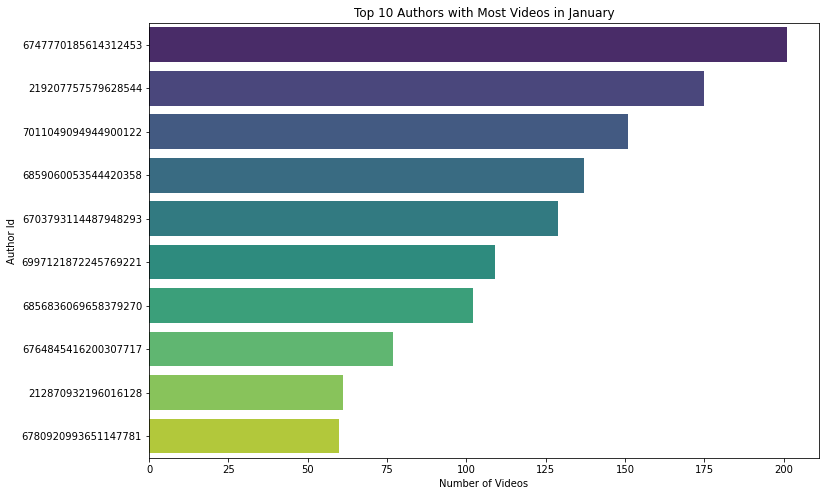

In [41]:
import matplotlib.pyplot as plt
import seaborn as sns

# Sort the dataframe by videoId count
df_sorted = df_jan_video_count.sort_values('videoId', ascending=False)

# Take top 10 authors with most videos for better visualization
df_top10 = df_sorted.head(10)

plt.figure(figsize=(12, 8))
sns.barplot(x='videoId', y='authorId', data=df_top10, palette='viridis')

plt.xlabel('Number of Videos')
plt.ylabel('Author Id')
plt.title('Top 10 Authors with Most Videos in January')

plt.show()


In [45]:
#Creating dataframe for Apr
df_apr = pd.DataFrame(extended_list_apr)
df_videolink_apr = pd.DataFrame(videolink_apr, columns = ['videoLink'])
df_video_object_apr = pd.DataFrame(video_object_apr, columns =['id'])
df_apr = df_apr.join(df_videolink_apr)
df_sticker = pd.DataFrame(StickerOnItem_apr, columns=['stickerText', 'stickerType'])
df_apr = df_apr.join(df_sticker)
df_apr = df_apr.join(df_hashtag)

pprint(df_apr.columns) #check index of the dataframe

Index(['BAInfo', 'adAuthorization', 'adLabelVersion', 'author', 'authorStats',
       'challenges', 'collected', 'contents', 'createTime', 'desc', 'digged',
       'diversificationId', 'duetDisplay', 'duetEnabled', 'duetInfo',
       'forFriend', 'id', 'isAd', 'itemCommentStatus', 'itemMute', 'music',
       'officalItem', 'originalItem', 'playlistId', 'privateItem', 'secret',
       'shareEnabled', 'showNotPass', 'stats', 'stickersOnItem',
       'stitchDisplay', 'stitchEnabled', 'textExtra', 'video', 'vl1', 'poi',
       'effectStickers', 'imagePost', 'warnInfo', 'maskType', 'anchors',
       'videoLink', 'stickerText', 'stickerType', 'hashtagId', 'hashtagName'],
      dtype='object')


In [46]:
#select and expand objects from the list and convert datetime of the content creation

from datetime import datetime
df_apr['authorId'] = df_apr.author.apply(lambda x: x.get('id'))
df_apr['commentCount'] = df_apr.stats.apply(lambda x: x.get('commentCount'))
df_apr['dateTime'] = df_apr.createTime.apply(datetime.fromtimestamp)
df_apr['desc']= df_apr.desc
df_apr['duetEnabled']= df_apr.duetEnabled
df_apr['duetFromId']= df_apr.duetInfo.apply(lambda x: x.get('duetFromId')) #indication that the content is a duet from another content
df_apr['diggCount'] = df_apr.stats.apply(lambda x: x.get('diggCount'))
df_apr['hashtagId'] = df_apr.hashtagId
df_apr['hashtagName'] = df_apr.hashtagName
df_apr['musicId'] = df_apr.music.apply(lambda x: x.get('id'))
df_apr['musicAuthorName'] = df_apr.music.apply(lambda x: x.get('authorName'))
df_apr['musicAlbum'] = df_apr.music.apply(lambda x: x.get('album'))
df_apr['musicTitle'] = df_apr.music.apply(lambda x: x.get('title'))
df_apr['musicPlayUrl']= df_apr.music.apply(lambda x: x.get ('playUrl'))
df_apr['playCount'] = df_apr.stats.apply(lambda x: x.get('playCount'))
df_apr['shareCount'] = df_apr.stats.apply(lambda x: x.get('shareCount'))
df_apr['stickerType']= df_apr.stickerType
df_apr['stickerText'] = df_apr.stickerText
df_apr['videoId'] = df_apr.id
df_apr['videoLink'] = df_apr.videoLink

In [47]:
# Group by 'authorId' and count unique 'desc' values
unique_desc_counts = df_apr.groupby('authorId')['desc'].nunique()

# Create a new dataframe to display the results
unique_desc_df = pd.DataFrame({'authorId': unique_desc_counts.index, 'unique_desc_count': unique_desc_counts.values})

# Sort the dataframe in descending order based on 'unique_desc_count'
unique_desc_df = unique_desc_df.sort_values(by='unique_desc_count', ascending=False)

# Reset the index for better presentation
unique_desc_df = unique_desc_df.reset_index(drop=True)

# Display the sorted dataframe
print(unique_desc_df)

                 authorId  unique_desc_count
0     6747770185614312453                165
1      219207757579628544                144
2     6859060053544420358                104
3     6703793114487948293                 86
4     6997121872245769221                 86
...                   ...                ...
2914  6786958465664975877                  1
2915  6787001648449373186                  1
2916  6787118771079332869                  1
2917  6787192782999602182                  1
2918  6811510415558935557                  1

[2919 rows x 2 columns]


In [48]:
#select necessary columns in April table

df_apr_video = df_apr[
    ['authorId',
     'commentCount',
     'dateTime',
     'desc',
     'diggCount',
     'duetEnabled',
     'duetFromId',
     'hashtagId',
     'hashtagName',
     'musicAlbum',
     'musicAuthorName',
     'musicId',
     'musicPlayUrl',
     'musicTitle',
     'playCount',
     'shareCount',
     'stickerText',
     'stickerType',
     'videoId',
     'videoLink']].copy()

# Calculate the sum of 'videoId' for each unique 'authorId'
df_apr_video_count = df_apr_video.groupby('authorId')['videoId'].count().reset_index()

# Get the unique 'videoId' rows from df_apr_video
df_apr_video_unique = df_apr_video.drop_duplicates(subset='videoId')

print('Number of unique video contributions:', len(df_apr_video_unique))

#Save to CSV file
df_apr_video_unique.to_csv('Video_df_apr.csv', index=False)

Number of unique video contributions: 6462


In [65]:
#select the file for Manuel

df_video = df_apr[
    ['authorId',
     'dateTime',
     'desc',
     'videoId',
     'videoLink']].copy()

print('Number of video contributions:', len(df_apr_video))

#Save to CSV file
df_video.to_csv('Video_df.csv', index=False)

Number of video contributions: 6975


In [63]:
video_desc = df_apr.loc[df_apr['id'] == '7069342650687606022', 'desc'].values[0]

print(video_desc)


I watched too many videos from ur mum Ashley #newyorkcity #foryou #liveabroad #digitalnomadlife #selfcareroutine


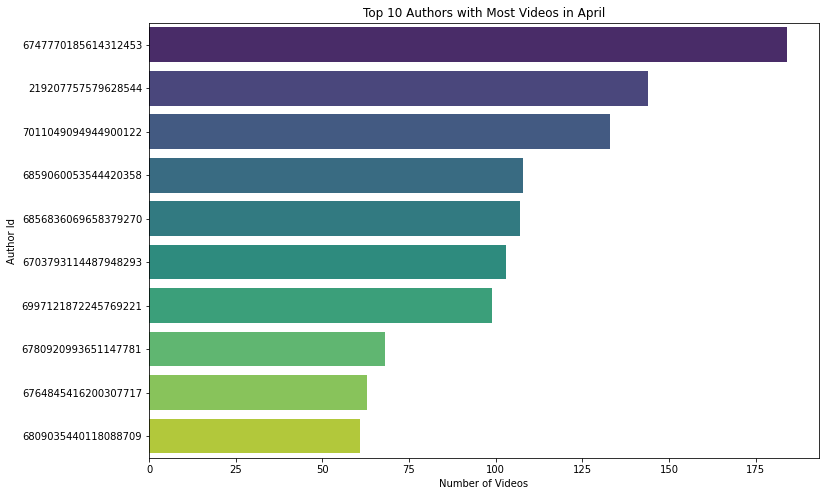

In [49]:
import matplotlib.pyplot as plt
import seaborn as sns

# Sort the dataframe by videoId count
df_sorted = df_apr_video_count.sort_values('videoId', ascending=False)

# Take top 10 authors with most videos for better visualization
df_top10 = df_sorted.head(10)

plt.figure(figsize=(12, 8))
sns.barplot(x='videoId', y='authorId', data=df_top10, palette='viridis')

plt.xlabel('Number of Videos')
plt.ylabel('Author Id')
plt.title('Top 10 Authors with Most Videos in April')

plt.show()
